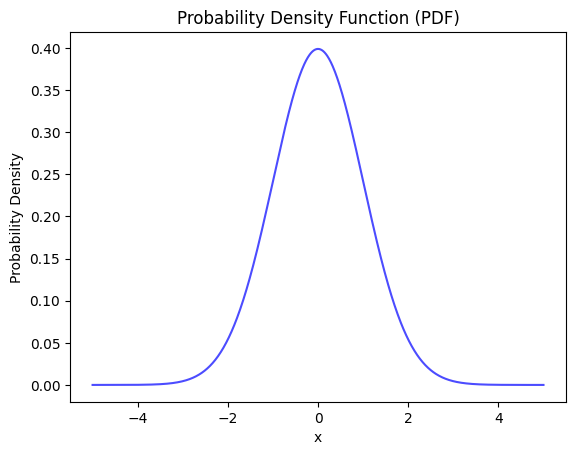

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import Priors

# Example data for continuous random variable
x = np.linspace(-5, 5, 1000)  # Generate x values
pdf = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)  # Example PDF (standard normal distribution)

# Plot the probability density function
plt.plot(x, pdf, color='blue', alpha=0.7)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function (PDF)')
plt.show()



2461.310682649326
0.0008999865101457834


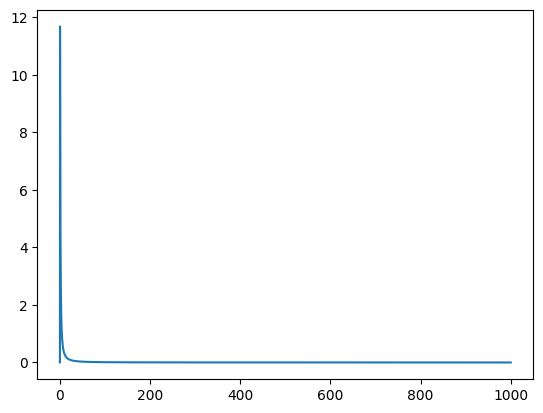

47.52047520475205


In [2]:
x = np.linspace(0, 1000, 100000)
inv = Priors.inverse_chi1_squared(x, 0.03**2)
print(np.sum(inv))
print(np.median(inv))
plt.plot(x, inv)
plt.show()
point = Priors.inverse_squared_prior(x, 0.03)
print(point)

In [3]:
A = np.array([[1, 2],
              [3, 4]])

B = np.array([[5, 6],
              [7, 8]])

C = np.array([[9, 10],
              [11, 12]])

# Multiply the matrices together
result = np.matmul(np.matmul(A, B), C)
r = A@B@C
print(result)
print(r)

[[ 413  454]
 [ 937 1030]]
[[ 413  454]
 [ 937 1030]]


In [4]:
pr = Priors.common_priors(0, 0.95, 25, 20, 100)


In [5]:
u = Priors.persistence_u(100)
print(u)

(0.9990990480652192, 0.9972916029173073, 0.15151515151515152)


In [6]:
from Trends import Regressors
T = 100
q_hat = 31

R_hat = Regressors.find_regressors(T, q_hat).T
sigma_m = Priors.symmetric_triangular_prior(0.1, 2, 25)/100
Sigma_m_hat = np.zeros((T,T))
rho_m = Priors.prior_from_half_life(50,150,25)
innov_variance = 1/(1-rho_m**2)
for i in range(T):
    for j in range(T):
        Sigma_m_hat[i][j] = (innov_variance/(1-rho_m**2))*(rho_m**abs(i-j))

Sigma_m = np.linalg.inv(R_hat.T@R_hat)@R_hat.T@Sigma_m_hat@R_hat@np.linalg.inv(R_hat.T@R_hat)
S_m = Priors.multivariate_normal_prior(np.zeros(Sigma_m.shape[0]), sigma_m**2*Sigma_m)

In [7]:
n = 180
K = Priors.group_factors(n, 25)
J = Priors.group_factors(25, 10)
print(len(K))
print(len(J))

180
25


In [8]:
p_c_lambda = np.random.dirichlet(np.ones(25)*20/25)
print(len(p_c_lambda))
print(np.sum(p_c_lambda))

25
0.9999999999999999
